<a href="https://colab.research.google.com/github/fartech00/01/blob/main/TAFU_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

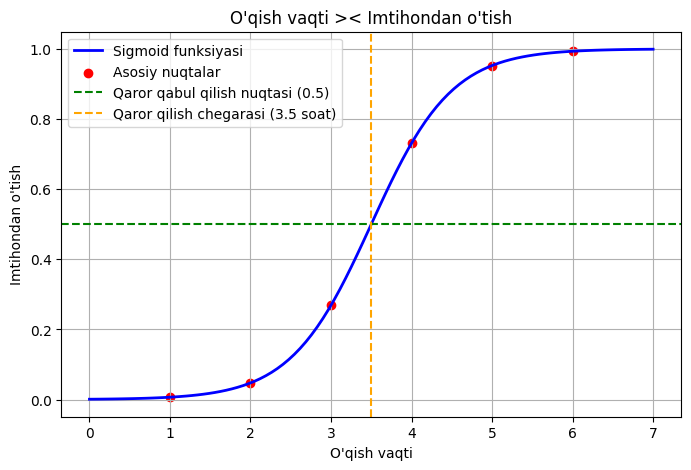

In [ ]:
# SIGMOID FUNKSIYASIGA OID MISOL

import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))
w1 = 2     # weight
b = -7     # bias

hours = np.linspace(0, 7, 100)
z = w1 * hours + b
prob = sigmoid(z)

#Plot
plt.figure(figsize=(8,5))
plt.plot(hours, prob, color='blue', linewidth=2, label='Sigmoid funksiyasi')
plt.scatter([1,2,3,4,5,6], sigmoid(w1*np.array([1,2,3,4,5,6])+b),
            color='red', label='Asosiy nuqtalar')
plt.axhline(0.5, color='green', linestyle='--', label='Qaror qabul qilish nuqtasi (0.5)')
plt.axvline(3.5, color='orange', linestyle='--', label='Qaror qilish chegarasi (3.5 soat)')

plt.title("O'qish vaqti >< Imtihondan o'tish")
plt.xlabel("O'qish vaqti")
plt.ylabel("Imtihondan o'tish")
plt.legend()
plt.grid(True)
plt.show()


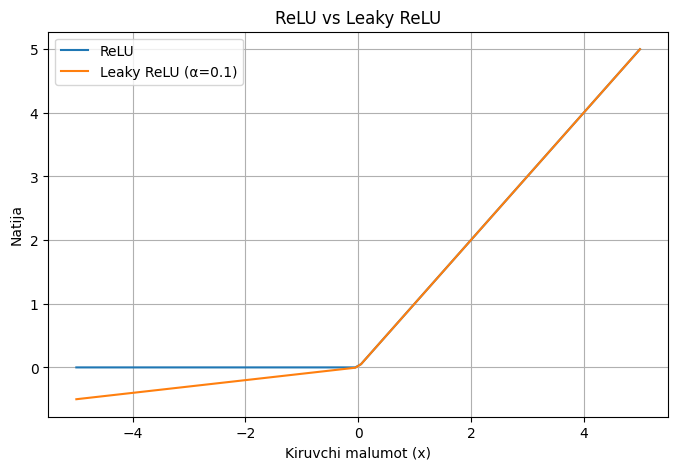

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100)
y_relu = F.relu(x)
y_leaky = F.leaky_relu(x, negative_slope=0.1)

plt.figure(figsize=(8,5))
plt.plot(x.numpy(), y_relu.numpy(), label="ReLU")
plt.plot(x.numpy(), y_leaky.numpy(), label="Leaky ReLU (α=0.1)")
plt.title("ReLU vs Leaky ReLU")
plt.xlabel("Kiruvchi malumot (x)")
plt.ylabel("Natija")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.LeakyReLU(0.1),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.LeakyReLU(0.1),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(64 * 8 * 8, 10),
    nn.Softmax(dim=1)
)


**Takrorlash**

> O'tilgan darsga oid savollarga javob bering



In [ ]:
!pip install gradio pandas

In [ ]:
import gradio as gr
import pandas as pd
from datetime import datetime
import os

# -----------------------------
# SAVOLLAR BAZASI
# -----------------------------
savollar = [
    {
        "savol": "1. Turing testi g‘oyasini kim taklif qilgan?",
        "variantlar": ["Alan Turing", "Jon Makkarti", "Marvin Minski", "Herbert Saymon"],
        "javob": "Alan Turing"
    },
    {
        "savol": "2. 'Sun’iy intellekt' atamasi birinchi marta qaysi tadbirda ishlatilgan?",
        "variantlar": ["MIT Simpoziumi 1958", "Dartmut konferensiyasi 1956", "AI qishi 1974", "NeurIPS konferensiyasi 1987"],
        "javob": "Dartmut konferensiyasi 1956"
    },
    {
        "savol": "3. Ekspert tizimlari asosan qaysi mantiqiy tamoyilga asoslangan?",
        "variantlar": ["Loyqa mantiq", "Neyron tarmoqlar", "Agar–unda (If–Then) qoidalari", "Ehtimollik modellari"],
        "javob": "Agar–unda (If–Then) qoidalari"
    },
    {
        "savol": "4. IBM’ning Deep Blue tizimi qanday yutuqqa erishgan?",
        "variantlar": [
            "U birinchi AI tizimi bo‘lib Turing testini o‘tagan",
            "U shaxmat bo‘yicha jahon chempioni Garri Kasparovni mag‘lub etgan",
            "U birinchi ekspert tizimini yaratgan",
            "U inson darajasida muloqot qilgan"
        ],
        "javob": "U shaxmat bo‘yicha jahon chempioni Garri Kasparovni mag‘lub etgan"
    },
    {
        "savol": "5. Qaysi neyron tarmoq arxitekturasi 2012-yilda ImageNet tanlovida g‘olib bo‘lgan?",
        "variantlar": ["LeNet", "AlexNet", "VGGNet", "ResNet"],
        "javob": "AlexNet"
    },
    {
        "savol": "6. AlexNet muvaffaqiyati asosan qaysi ikki omil bilan bog‘liq?",
        "variantlar": [
            "Tezkor CPU’lar va kichik ma’lumotlar bazasi",
            "GPU’lardan foydalanish va katta belgilangan ma’lumotlar to‘plami",
            "Genetik algoritmlar va ramziy fikrlash",
            "Qoidaga asoslangan dasturlash"
        ],
        "javob": "GPU’lardan foydalanish va katta belgilangan ma’lumotlar to‘plami"
    },
    {
        "savol": "7. MYCIN kabi ekspert tizimlari asosan qaysi sohada qo‘llanilgan?",
        "variantlar": [
            "Tibbiy tashxis",
            "Tasvirlarni tasniflash",
            "Avtonom harakatlanish",
            "Nutqni aniqlash"
        ],
        "javob": "Tibbiy tashxis"
    },
    {
        "savol": "8. Dastlabki ekspert tizimlarining asosiy kamchiligi nimada edi?",
        "variantlar": [
            "Ular mantiqan fikrlay olmagan",
            "Ular qarorlarini tushuntirib bera olmagan",
            "Ular yangi bilimlarni avtomatik o‘rganolmagan",
            "Ular GPU hisoblashga muhtoj bo‘lgan"
        ],
        "javob": "Ular yangi bilimlarni avtomatik o‘rganolmagan"
    },
]

# -----------------------------
# TEST HISOBLASH FUNKSIYASI
# -----------------------------
def baholash(ism, *javoblar):
    if not ism.strip():
        return "⚠️ Iltimos, ismingizni kiriting!"

    fayl_nomi = "ai_test_natijalar.csv"

    # Agar fayl mavjud bo‘lsa, o‘qib tekshiramiz
    if os.path.exists(fayl_nomi):
        old = pd.read_csv(fayl_nomi)
        if ism in old["Ism"].values:
            return f"❌ Hurmatli {ism}, siz bu testni allaqachon topshirgansiz.\n👉 'Test avval topshirilgan'"

    # Hisoblash
    ball = 0
    jami = len(savollar)
    for i, jav in enumerate(javoblar):
        if jav == savollar[i]["javob"]:
            ball += 1

    foiz = (ball / jami) * 100
    natija = f"✅ Talaba: {ism}\nBall: {ball}/{jami}\nTo‘g‘rilik foizi: {foiz:.1f}%"

    # Natijani saqlash
    yangi = pd.DataFrame([[ism, ball, jami, foiz, datetime.now().strftime("%Y-%m-%d %H:%M:%S")]],
                         columns=["Ism", "Ball", "Jami", "Foiz", "Vaqt"])
    if os.path.exists(fayl_nomi):
        df = pd.concat([old, yangi], ignore_index=True)
    else:
        df = yangi
    df.to_csv(fayl_nomi, index=False)

    return natija

# -----------------------------
# GRADIO INTERFESI
# -----------------------------
with gr.Blocks(title="Sun’iy Intellekt Tarixi Testi") as demo:
    gr.Markdown(
        """
        # 🤖 Sun’iy intellekt tarixi bo‘yicha test
        **O‘qituvchi:** Dr. [Ismingizni kiriting]
        **Kurs:** Sun’iy intellektga kirish (onlayn modul)
        ---
        🧭 Quyidagi shaklda o‘zingizning ismingizni kiriting, barcha savollarga javob bering va testni topshiring.
        ⚠️ Diqqat! Har bir talaba testni faqat **bir marta** topshira oladi.
        """
    )

    ism = gr.Textbox(label="Ismingizni kiriting", placeholder="Masalan: Dilshod Karimov")

    javob_kiritishlar = []
    for s in savollar:
        javob_kiritishlar.append(gr.Radio(choices=s["variantlar"], label=s["savol"]))

    tugma = gr.Button("✅ Testni yuborish")
    chiqish = gr.Textbox(label="Sizning natijangiz", lines=5)

    tugma.click(fn=baholash, inputs=[ism] + javob_kiritishlar, outputs=chiqish)

demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4e3fe70ff7c65a29d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **KNN:** algoritmi bo'yicha klassifikatsiyalash

In [ ]:
# ================================
# 1: Kutibxonalarni chaqirib olamiz
# ================================
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


Malumot shakli: (1797, 64)
Belgilanganlar: (1797,)


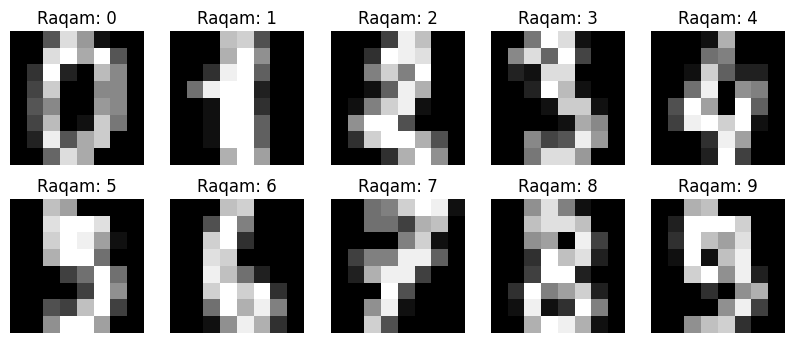

In [ ]:
# ================================
# 2: Rasmli malumotlarni yuklab olamiz
# ================================
digits = datasets.load_digits()
X = digits.data    # 8x8=64, yani har bir rasmni son ko'rinishida ibodalab olamiz
y = digits.target  # va bu sonlar qaysi raqamni DNK si ekanini bilgilab olamiz

print("Malumot shakli:", X.shape)
print("Belgilanganlar:", y.shape)

# Rasmli malumotlarni ifodalash uchun code
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Raqam: {digits.target[i]}")
    plt.axis('off')
plt.show()


In [ ]:
# ================================
# 3: Train/Test ga ajratib olamiz
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# RAqamlarni xususiyatlarini qiymatlab olamiz
# agarda biz insonni tashqi ko'rinishini klassifikatsiya qilayotgan bo'lsak:
    # Bo'yi: 150-200
    # Vazni: 50-120
    # deb belgilasak. Bunda algoritm Insonni bo'yi muhimroq, chunki qiymati kattaroq deb hisoblab qolishi mumkin.
# Shuning uchun raqamlarni xususiyatlarini qiymatlab olamiz.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)   #  k=5
knn.fit(X_train, y_train)                   # Train on training data
print("✅ K-NN Modeli o'rganishni tugatdi.")



✅ K-NN Modeli o'rganishni tugatdi.


ANIQLILIGI: 0.9703703703703703

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       0.96      1.00      0.98        53
           3       0.98      0.98      0.98        55
           4       0.98      0.93      0.95        54
           5       0.98      0.96      0.97        55
           6       0.98      0.98      0.98        54
           7       0.93      0.98      0.95        54
           8       0.98      0.92      0.95        52
           9       0.96      0.94      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



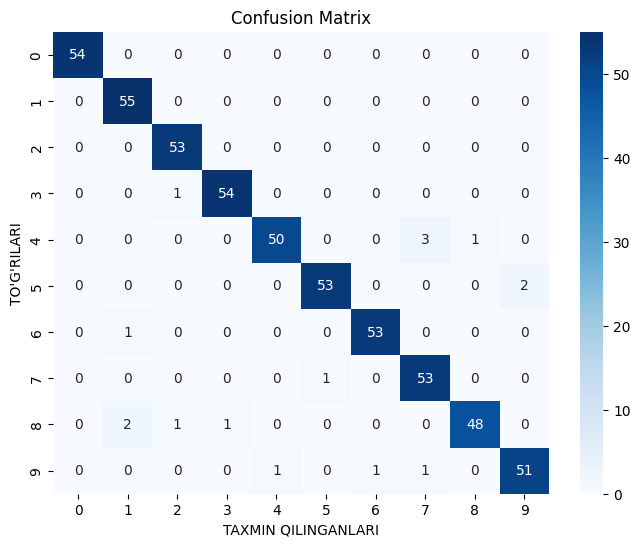

In [ ]:
# TEST QILISH
# ================================
y_pred = knn.predict(X_test)

print("ANIQLILIGI:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("TAXMIN QILINGANLARI")
plt.ylabel("TO'G'RILARI")
plt.title("Confusion Matrix")
plt.show()


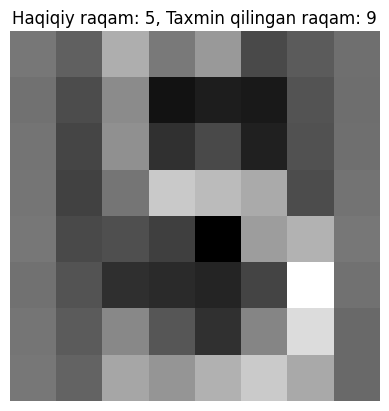

In [ ]:
# 4: K-NN da turli raqamlarni klassifikatsiya qilish testi
# ================================
import numpy as np
rand_index = np.random.randint(0, len(X_test))

# Test qilinayotgan raqamni ifodalash
plt.imshow(X_test[rand_index].reshape(8, 8), cmap='gray')
plt.title(f"Haqiqiy raqam: {y_test[rand_index]}, Taxmin qilingan raqam: {knn.predict([X_test[rand_index]])[0]}")
plt.axis('off')
plt.show()

## **Decision Tree** algoritmi bo'yicha klassifikatsiyalash


In [ ]:
# DECISION TREE algoritmi

# 1: Kutobxonalarni chaqirish
# =========================
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
# 2: Dataset ni yuklash (raqamlar: 0-9,  8x8 pixelli)
# ===================================================
digits = load_digits()
X, y = digits.data, digits.target
# X = raqamni xususiyatlari (pixelda ifodalangan),
# y = belgilab olingan raqamlar (0-9)

print("Dataset shakli:", X.shape)   # (1797, 64) -> 1797 ta rasm, har biri 64 pixelli
print('Belgilanga sinflar, yani "y" da ifodalangan:',
      set(y))




# 3: Dataset ni training and testing qismlarga bo'lib olish
# =======================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Dataset shakli: (1797, 64)
Belgilanga sinflar, yani "y" da ifodalangan: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [ ]:
# 4: Decision Tree algoritmini o'qitish boshlanishi
# ==============================
dt = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
dt.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# 5: O'qtilgan Modelni aniqlilik darajasi
# =======================
y_pred = dt.predict(X_test)
print("Modelni aniqliligi:", accuracy_score(y_test, y_pred))

Modelni aniqliligi: 0.85


In [ ]:
# 6: Ramdom rasm bilan test qilish
# ================================
import numpy as np
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(8, 8), cmap="gray")
plt.title(f"Haqiqiy raqam: {y_test[i]}, Taxmin qilingan raqam: {dt.predict([X_test[i]])[0]}")
plt.axis("on")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, max_depth=2, feature_names=[f"pixel{i}" for i in range(64)])
plt.show()

## **Random forest:** algoritmi bo'yicha klassifikatsiyalash

In [ ]:
# ================================
# 1. Kutubxonalarni chaqirish
# ================================
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 2. DAtaset yuklash
# ================================
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ================================
# 3. RF ni train qilish
# ================================
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
print("✅ RF modeli qurildi.")


✅ RF modeli qurildi.


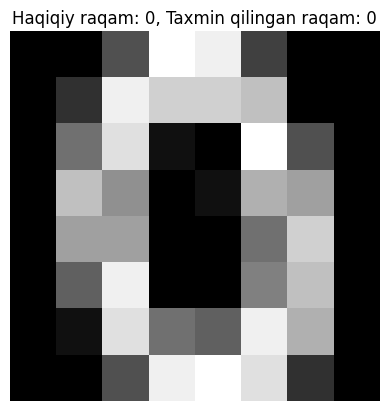

In [ ]:
# ================================
# 4. Test on a random digit
# ================================
rand_index = np.random.randint(0, len(X_test))
plt.imshow(X_test[rand_index].reshape(8, 8), cmap='gray')

pred = rf.predict([X_test[rand_index]])[0]
plt.title(f"Haqiqiy raqam: {y_test[rand_index]}, Taxmin qilingan raqam: {pred}")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    rf.estimators_[0],
    filled=True,
    max_depth=3,
    feature_names=[f"pixel{i}" for i in range(64)],
    class_names=[str(i) for i in range(10)],
    rounded=True
)
plt.show()


## **KNN:** algoritmi bo'yicha klassifikatsiyalash

In [ ]:
# Kerakli kutubxonalarni chaqirib olamiz
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Malumotlarni yuklab olamiz
digits = datasets.load_digits()  # Raqamlar misolida
X = digits.data
y = digits.target

# Faqat 0 va 1 sonlari misolida SVM ni ishlatib ko'ramiz
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Malumotni taqsimlash
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normallashtirish
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# SVM algoritmi yordamida model qurishni boshlash

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



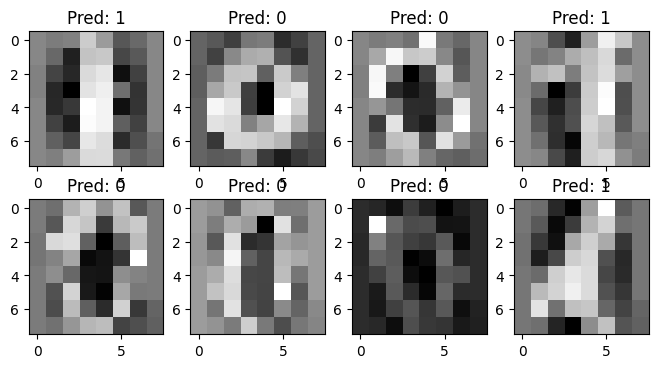

In [ ]:
plt.figure(figsize=(8,4))
for index, (image, label) in enumerate(zip(X_test[0:8], y_pred[0:8])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray)
    plt.title(f'Pred: {label}')
plt.show()

## **Logistic regression:** algoritmi bo'yicha klassifikatsiyalash

In [ ]:
# ================================
# 1. Imports
# ================================
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 2. Load digits dataset
# ================================
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================================
# 3. Train Logistic Regression
# ================================
logreg = LogisticRegression(max_iter=1000)  # Increase iterations to converge
logreg.fit(X_train, y_train)
print("✅ Logistic Regression model trained.")



✅ Logistic Regression model trained.


In [ ]:
# ================================
# 6: Modelni test qilish
# ================================
y_pred = logreg.predict(X_test)

# Natijalarni baholash
acc = accuracy_score(y_test, y_pred)
print(f"Aniqlik (Accuracy): {acc*100:.2f}%")

print("Klassifikatsiya hisoboti:")
print(classification_report(y_test, y_pred))

# ================================
# 7: Confusion matritsasini chizish
# ================================
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


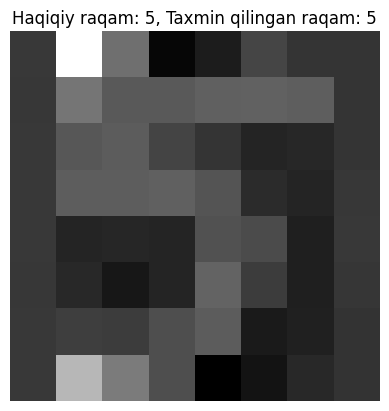

In [ ]:
# Random test
rand_index = np.random.randint(0, len(X_test))

# Test image
plt.imshow(X_test[rand_index].reshape(8, 8), cmap='gray')

# Prediction
pred = logreg.predict([X_test[rand_index]])[0]

plt.title(f"Haqiqiy raqam: {y_test[rand_index]}, Taxmin qilingan raqam: {pred}")
plt.axis('off')
plt.show()


## **Naive Bayes** algoritmi

Dataset shape: (1797, 64)
Labels shape: (1797,)


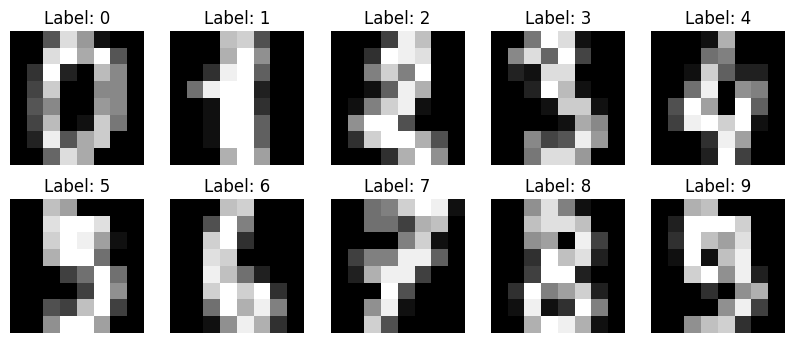

✅ Naive Bayes modeli qurildi.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

digits = datasets.load_digits()
X = digits.data
y = digits.target

print("Dataset shape:", X.shape)  # (n_samples, 64)
print("Labels shape:", y.shape)

# ===========================
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.show()

#=============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#========================

nb = GaussianNB()
nb.fit(X_train, y_train)
print("✅ Naive Bayes modeli qurildi.")




Accuracy: 77.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.53      0.84      0.65        55
           2       0.86      0.57      0.68        53
           3       1.00      0.44      0.61        55
           4       0.97      0.69      0.80        54
           5       0.93      0.91      0.92        55
           6       0.93      0.98      0.95        54
           7       0.75      0.98      0.85        54
           8       0.46      0.73      0.56        52
           9       0.88      0.69      0.77        54

    accuracy                           0.77       540
   macro avg       0.83      0.77      0.77       540
weighted avg       0.83      0.77      0.77       540



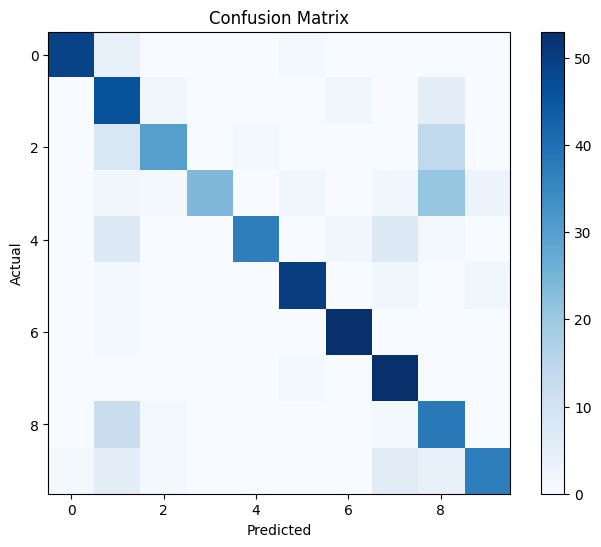

In [ ]:

y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

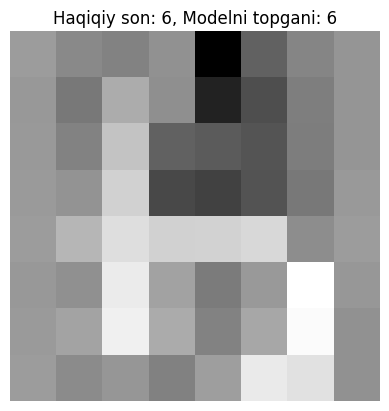

In [ ]:
rand_idx = np.random.randint(0, len(X_test))
plt.imshow(X_test[rand_idx].reshape(8,8), cmap='gray')
plt.title(f"Haqiqiy son: {y_test[rand_idx]}, Modelni topgani: {nb.predict([X_test[rand_idx]])[0]}")
plt.axis('off')
plt.show()

## Unsupervised learning K-means algoritm misolida


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


image = cv2.imread('/content/is.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape(-1, 3)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_image = new_colors.reshape(image.shape).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Haqiqiy rasm")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Klaster qilingan rasm {k} k-qiymati miqdorida")
plt.imshow(quantized_image)
plt.axis('off')

plt.show()


In [ ]:
labels = kmeans.labels_.reshape(image.shape[:2])

plt.figure(figsize=(6, 6))
plt.title("Ajralgan qismlarni belgilan olish")
plt.imshow(labels, cmap='tab10')
plt.axis('off')
plt.show()


In [ ]:
# Ajralgan label qismlarni uint8 formatiga o'zgartirib, kontirlarni aniqlaymiz
label_uint8 = (labels * (255 / (labels.max()))).astype(np.uint8)

# Har bir kluster qilingan hudud bo'yicha kontorlarni topamiz
contours, _ = cv2.findContours(label_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Chizishni boshlaymiz
outlined = quantized_image.copy()
cv2.drawContours(outlined, contours, -1, (0, 0, 0), 2)  # qaysi rangda?

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Quantize bo'lgan rasm")
plt.imshow(quantized_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Klaster bo'lgan rasm")
plt.imshow(outlined)
plt.axis('off')
plt.show()


In [ ]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixels)
quantized = kmeans.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)

# Labellarni 2D rasm ko'rinishiga obkelamiz

label_map = labels.reshape(image.shape[:2]).astype(np.int32)

# Klusterlar o'rtasidagi chegaralarni topamiz
edges = np.zeros_like(label_map, dtype=np.uint8)
edges[:-1, :] |= (label_map[:-1, :] != label_map[1:, :])
edges[:, :-1] |= (label_map[:, :-1] != label_map[:, 1:])

# RGB kanal shakliga o'rkazamiz
edges_colored = np.zeros_like(image)
edges_colored[edges > 0] = [255, 0, 0]

# Quantize bo'lgan rasmga qizil chiziq chizamiz
outlined = cv2.addWeighted(quantized, 1.0, edges_colored, 1.0, 0)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Haqiqiy rasm")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(outlined)
plt.title(f"{k}-ta rangda Kluster bo'lgan rasm, chegara chiqizlari bilan")
plt.axis("off")

plt.show()


## GAN misolida

In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [ ]:
##########################
### SETTINGS
##########################

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

# Hyperparametrlar
random_seed = 123
generator_learning_rate = 0.001
discriminator_learning_rate = 0.001
NUM_EPOCHS = 100
BATCH_SIZE = 128
LATENT_DIM = 75
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x



##########################
### MNIST DATASET
##########################

train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

# Datasetni tekshirish
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

100%|██████████| 9.91M/9.91M [00:00<00:00, 60.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.53MB/s]

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [ ]:
##########################
### MODEL
##########################


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()


        self.generator = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, IMG_SIZE),
            nn.Tanh()
        )

        self.discriminator = nn.Sequential(
            nn.Linear(IMG_SIZE, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )


    def generator_forward(self, z):
        img = self.generator(z)
        return img

    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)

In [ ]:
torch.manual_seed(random_seed)

model = GAN()
model = model.to(device)

optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [ ]:
start_time = time.time()

NUM_EPOCHS = 10

discr_costs = []
gener_costs = []
for epoch in range(NUM_EPOCHS):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):



        features = (features - 0.5)*2.
        features = features.view(-1, IMG_SIZE).to(device)
        targets = targets.to(device)

        valid = torch.ones(targets.size(0)).float().to(device)
        fake = torch.zeros(targets.size(0)).float().to(device)

        # --------------------------
        # Generator ni o'qitish
        # --------------------------

        # Yangirasmlar yashash
        z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
        generated_features = model.generator_forward(z)

        # Ajratish
        discr_pred = model.discriminator_forward(generated_features)

        gener_loss = F.binary_cross_entropy(discr_pred, valid)

        optim_gener.zero_grad()
        gener_loss.backward()
        optim_gener.step()

        # --------------------------
        # Ajratuvchini o'qitish
        # --------------------------

        discr_pred_real = model.discriminator_forward(features.view(-1, IMG_SIZE))
        real_loss = F.binary_cross_entropy(discr_pred_real, valid)

        discr_pred_fake = model.discriminator_forward(generated_features.detach())
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake)

        discr_loss = 0.5*(real_loss + fake_loss)

        optim_discr.zero_grad()
        discr_loss.backward()
        optim_discr.step()

        discr_costs.append(discr_loss)
        gener_costs.append(gener_loss)


        # Log qilish
        if not batch_idx % 10:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f'
                   %(epoch+1, NUM_EPOCHS, batch_idx,
                     len(train_loader), gener_loss, discr_loss))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
ax1 = plt.subplot(1, 1, 1)
ax1.plot(range(len(gener_costs)), [cost.detach().numpy() for cost in gener_costs], label='Generator loss')
ax1.plot(range(len(discr_costs)), [cost.detach().numpy() for cost in discr_costs], label='Discriminator loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.legend()

###################

ax2 = ax1.twiny()
newlabel = list(range(NUM_EPOCHS+1))
iter_per_epoch = len(train_loader)
newpos = [e*iter_per_epoch for e in newlabel]

ax2.set_xticklabels(newlabel[::10])
ax2.set_xticks(newpos[::10])

ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 45))
ax2.set_xlabel('Epochs')
ax2.set_xlim(ax1.get_xlim())
###################

plt.show()

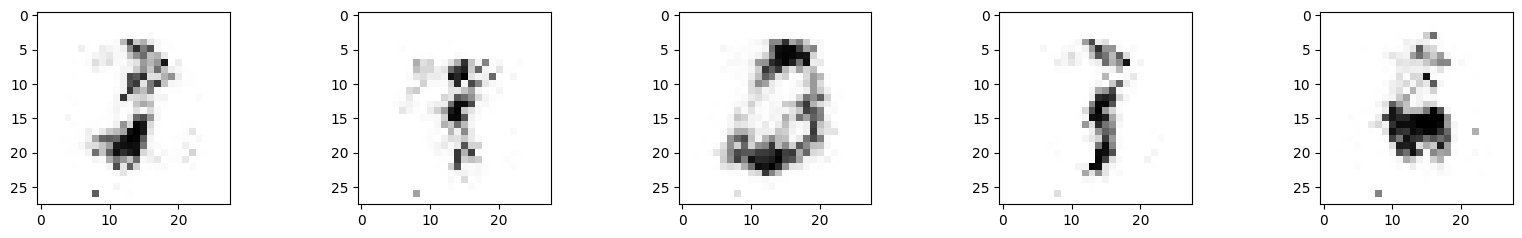

In [ ]:
##########################
### VISUALIZATION
##########################


model.eval()
# Yangi rasmlar yasash
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

## Yuzdagi nuqtalar bilan ishlash

> Face landmarks

> Mediapipe - 468 nuqtani yuzda joylashuvi

> [link text](https://mediapipe.readthedocs.io/en/latest/solutions/face_mesh.html)







In [1]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 8.8 MB/s eta 0:00:00

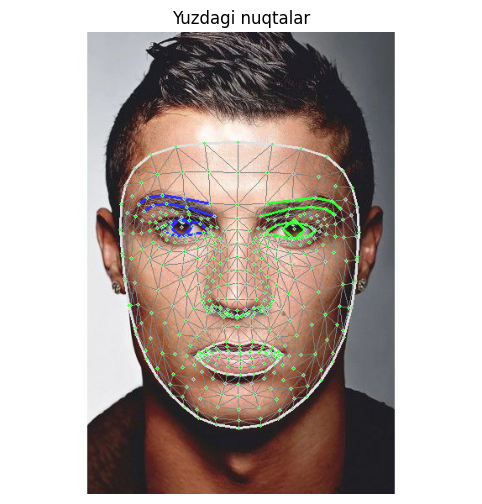

In [ ]:
# ======================================
# MEDIAPIPE - yuzdagi nuqtalarni topish
# ======================================

import cv2
import mediapipe as mp
from google.colab import files
import matplotlib.pyplot as plt

image_path = '/content/c.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mediapipe ni ishga tushirish
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:


    results = face_mesh.process(image)

    if not results.multi_face_landmarks:
        print("Nuqtalar yo'q")
    else:

        # Nuqtalarni chiqiz boshlandi
        annotated = image.copy()
        for face_landmarks in results.multi_face_landmarks:


            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_tesselation_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_contours_style()
            )
            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_styles.get_default_face_mesh_iris_connections_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated,
                landmark_list=face_landmarks,
                connections=None,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
            )

        plt.figure(figsize=(8, 6))
        plt.imshow(annotated)
        plt.axis('off')
        plt.title("Yuzdagi nuqtalar")
        plt.show()


 OLMA + #10 
KORDINATA O'QI:  (271, 131)


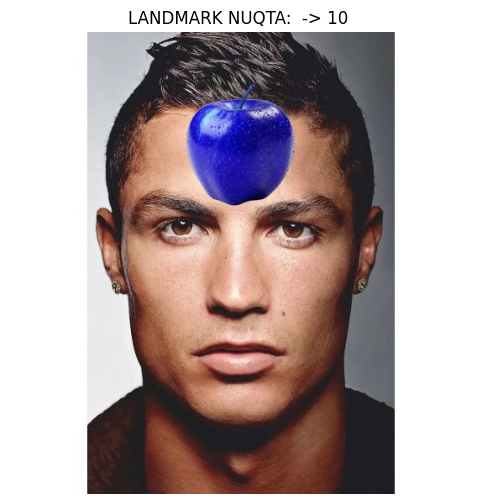

In [ ]:

face_path = "/content/c.jpg"
apple_path = "/content/olma.png"

face_img = cv2.imread(face_path)
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
apple_img = cv2.imread(apple_path, cv2.IMREAD_UNCHANGED)
mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:
    results = face_mesh.process(face_img)

if not results.multi_face_landmarks:
    print(" Yuz topilmadi")
else:
    annotated = face_img.copy()
    h, w, _ = annotated.shape
    face_landmarks = results.multi_face_landmarks[0]



    #  NUQTANI BELGILASH
    landmark_index = 10
    landmark = face_landmarks.landmark[landmark_index]
    x = int(landmark.x * w)
    y = int(landmark.y * h)

    print(f" OLMA + #{landmark_index} ")
    print(f"KORDINATA O'QI:  ({x}, {y})")



    # Olmani razmerini belgilash
    scale = 0.5
    apple_h, apple_w = apple_img.shape[:2]
    new_w = int(apple_w * scale)
    new_h = int(apple_h * scale)
    apple_resized = cv2.resize(apple_img, (new_w, new_h))

    x1, y1 = x - new_w // 2, y - new_h // 2
    x2, y2 = x1 + new_w, y1 + new_h

    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(w, x2)
    y2 = min(h, y2)

    roi = annotated[y1:y2, x1:x2]

    if apple_resized.shape[2] == 4:
        alpha = apple_resized[:, :, 3] / 255.0
        for c in range(3):
            roi[:, :, c] = (1 - alpha) * roi[:, :, c] + alpha * apple_resized[:, :, c]
    else:
        roi[:] = apple_resized

    annotated[y1:y2, x1:x2] = roi
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated)
    plt.axis('off')
    plt.title(f"LANDMARK NUQTA:  -> {landmark_index} ")
    plt.show()


## **YOLO** misolida

In [ ]:
!pip install ultralytics
!pip install opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00


## Yolo da **object detection** qilamiz


0: 640x640 1 zebra, 560.8ms
Speed: 10.7ms preprocess, 560.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


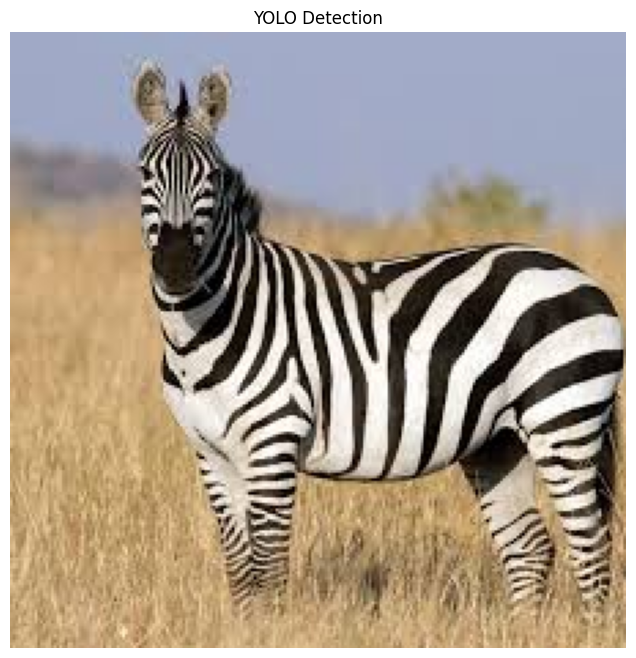

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

image_path = "/content/zebra.jpeg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model.predict(img_rgb)


# person=0, car=2, dog=16, cat=15, horse=17
target_classes = [0]  # insonlar uchun
target_classes = [2] # moshinalar uchun
target_classes = [15,16,17,18] # hayvonlar uchun
target_classes = [22]
target_classes = [23]
annotated_img = img_rgb.copy()

for r in results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        if cls_id in target_classes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            label = f"{model.names[cls_id]} {conf:.2f}"

            # bounding box chizish
            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(annotated_img, label, (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)


plt.figure(figsize=(12,8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("YOLO Detection")
plt.show()
